## Задача 1
Есть лодка с начальной скоростью $v_0=3$ и массой $m=10$. На лодку также действует сопротивление воды $F_c(v)$.

Необходимо:

1) Найти уравнение движения лодки

2) Построить фазовый портрет

### Аналитическое решение

In [ ]:
import sympy as sp
from sympy.abc import k,m,t

x = sp.Function('x')
v0 = 3
mcur = 10
kcur = 0.5

eqn = sp.Eq(m*sp.Derivative(x(t), t, 2),-k*sp.Derivative(x(t), t))
eqn

Eq(m*Derivative(x(t), (t, 2)), -k*Derivative(x(t), t))

Eq(x(t), 3*m/k - 3*m*exp(-k*t/m)/k)

3*exp(-k*t/m)

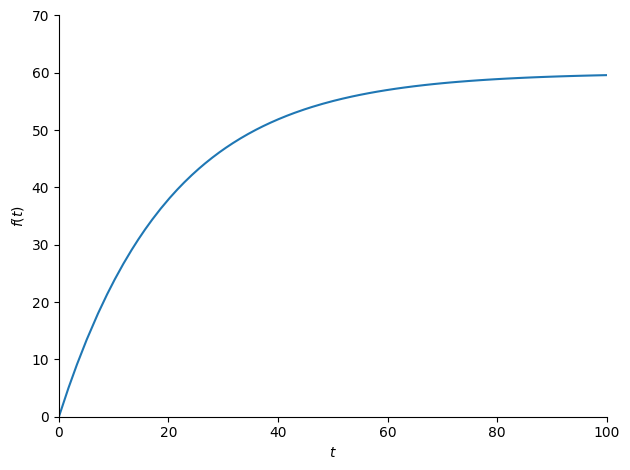

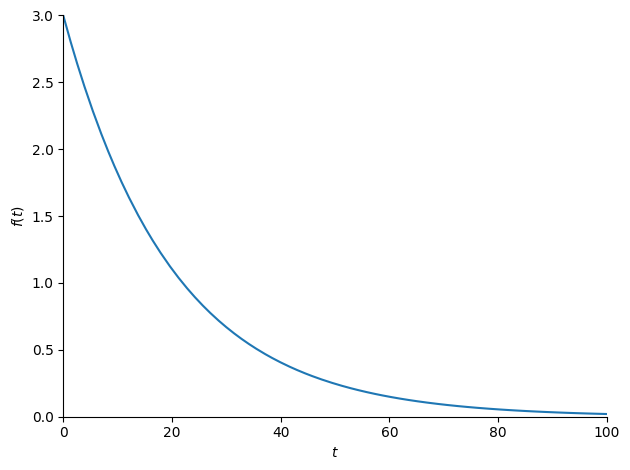

In [ ]:
result = sp.dsolve(eqn, x(t), ics={x(t).diff(t).subs(t, 0): v0, x(0):0})
# result = sp.dsolve(eqn, x(t))
resultcur = result.subs({m:mcur, k: kcur}).rhs
display(result)
dresult = sp.diff(result.rhs,t)
display(dresult)
sp.plot(resultcur,(t,0,100),xlim=(0,100),ylim=(0,70))
sp.plot(dresultcur,(t,0,100),xlim=(0,100),ylim=(0,3))


In [ ]:
v0 = 3
mcur = 10
v2 = v0/2
kcur = 0.5

t = sp.Symbol('t')
x = sp.Function('x')
u = sp.Function('u')

eqn1 = sp.Eq(u(t),sp.Derivative(x(t), t))
display(eqn1)
eqn2 = sp.Eq(m*sp.Derivative(u(t), t),-k*u(t))
display(eqn2)
rr = sp.dsolve([eqn1,eqn2], [x(t),u(t)],ics={x(t).diff(t).subs(t, 0): v0, x(0):0})
display(rr[0])
display(rr[1])

Eq(u(t), Derivative(x(t), t))

Eq(m*Derivative(u(t), t), -k*u(t))

Eq(x(t), 3*m/k - 3*m*exp(-k*t/m)/k)

Eq(u(t), 3*exp(-k*t/m))

In [ ]:
import matplotlib.pyplot as plt

def drawPhasePortrait(deltaX = 1, deltaDX = 1, startX = 0,  stopX = 1, startDX = 1, stopDX = 10, ts = 70, dt = 1):
    eqn1 = sp.Eq(u(t),sp.Derivative(x(t), t))
    eqn2 = sp.Eq(m*sp.Derivative(u(t), t),-k*u(t))
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                arrayx = []
                arraydx = []
                sol = rr = sp.dsolve([eqn1,eqn2], [x(t),u(t)],ics={x(t).diff(t).subs(t, 0): dy0, x(0):y0})
                curx = rr[0].rhs.subs({m:mcur,k:kcur})
                curdx = rr[1].rhs.subs({m:mcur,k:kcur})
                for curt in range(0,ts,dt):
                  arrayx.append(curx.subs(t,curt))
                  arraydx.append(curdx.subs(t,curt))
                plt.plot(arrayx, arraydx, 'b')
    plt.xlabel('x')
    plt.ylabel('dx/dt')
    plt.grid()
    plt.show()

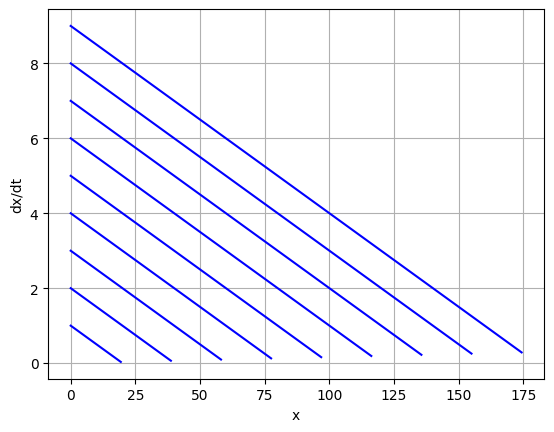

In [ ]:
drawPhasePortrait()

### Численное решение

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e-01 ...  9.980e+01  1.000e+02]
        y: [[ 0.000e+00  5.982e-01 ...  5.959e+01  5.959e+01]
            [ 3.000e+00  2.970e+00 ...  2.047e-02  2.027e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


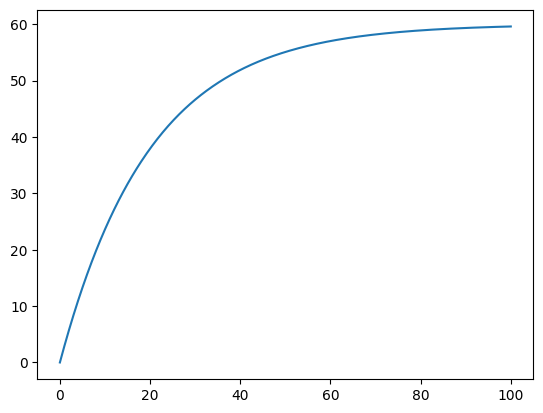

In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

x0 = 0
v0 = 3
mcur = 10
kcur = 0.5

def f(t,y,k,m):
  return [y[1],y[1]*(-k/m)]

y_0 = [x0,v0]
t_0 = 0
t_final = 100
t_eval = np.linspace(t_0,t_final,  500)

solution = scipy.integrate.solve_ivp(f, (t_0, t_final), y_0, t_eval=t_eval,args=[kcur,mcur])
print(solution)
plt.plot(solution.t,solution.y[0])

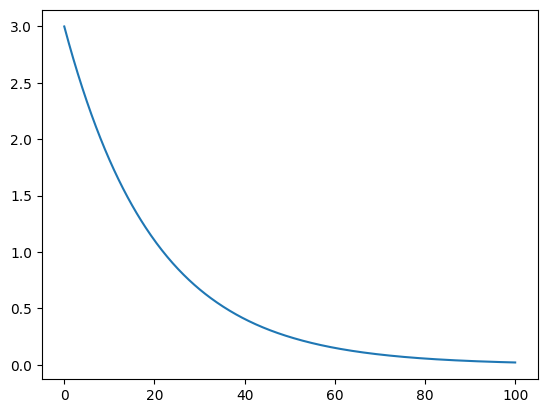

In [ ]:
plt.plot(solution.t,solution.y[1])

In [ ]:
special_solx = solution.y[0]
special_soly = solution.y[1]

In [ ]:
x0 = 0
v0 = 3
mcur = 10
kcur = 0.5

def f(t,y,k,m):
  return [y[1],y[1]*(-k/m)]

def drawPhasePortrait(deltaX = 1, deltaDX = 1, startX = 0,  stopX = 1, startDX = 1, stopDX = 10, ts = 70, dt = 0.5):
    t_eval = np.linspace(0,ts,  int(dt*ts))
    arrayx = []
    arraydx = []
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                  solution = scipy.integrate.solve_ivp(f, (t_0, t_final), [y0,dy0], t_eval=t_eval,args=[kcur,mcur])
                  arrayx = arrayx + list(solution.y[0])
                  arraydx = arraydx + list(solution.y[1])
    darrayx = [0] + list(np.diff(arrayx))
    darraydx = [0] + list(np.diff(arraydx))
    plt.quiver(arrayx,arraydx,darrayx,darraydx,color='b')
    plt.plot(special_solx, special_soly, color='r',linewidth=3)
    plt.title('Phase Portrait', fontsize=14)
    plt.xlabel("x")
    plt.ylabel("dx/dt")

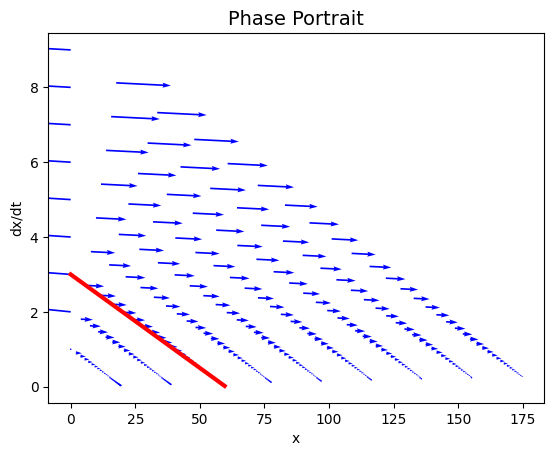

In [ ]:
drawPhasePortrait()